## Import Libraries

In [1]:
import pandas as pd

In [ ]:
pip install pytorch_transformers

In [ ]:
pip install fast_bert

In [4]:
from pytorch_transformers import BertTokenizer
from pathlib import Path
import torch

from IPython.display import clear_output

# from box import Box
import pandas as pd
import collections
import os
from tqdm import tqdm, trange
import sys
import random
import numpy as np
# import apex
from sklearn.model_selection import train_test_split
import re
# from nltk.tokenize import sent_tokenize, word_tokenize
import csv

import datetime

from fast_bert.modeling import BertForSequenceClassification
from fast_bert.data_cls import BertDataBunch, InputExample, InputFeatures, TextProcessor, convert_examples_to_features
from fast_bert.learner_cls import BertLearner
# from fast_bert.metrics import accuracy, accuracy_thresh, fbeta, roc_auc, confusion_matrix_overall, confusion_matrix_by_class, roc_auc_score_by_class, F1_by_class

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
pip install pyate

In [6]:
from os import cpu_count
import pandas as pd
# from tqdm import tqdm
# from . import Helper/
import spacy
from pyate.term_extraction_pipeline import TermExtractionPipeline
import re
import numpy as np
from tqdm import tqdm
# from .modified_pyate import Modified_PYATE
from typing import List
tqdm.pandas()
spacy.prefer_gpu()


False

In [7]:
import nltk
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.summarization import keywords
from nltk.util import ngrams

In [8]:
!pip install bert

# !python3 -m venv tensorflow-macos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3764 sha256=84e41063ff49a9e9b5badb85c02818e4965c248deeaf0065bdf0b10228d776f7
  Stored in directory: /root/.cache/pip/wheels/65/11/40/6439aef2635f7f0137a79c4defb4c4e65dd051ec0198429e3b
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6795 sha256=caa8772e207eaf4cc1e3b967931ee1d56b5466c3e02d6666b30bbf289798d934
  Stored in directory: /root/.cache/pip/wheels/ee/c9/a6/41a81618e939b746a3151700565d191bca832b6c345ea9b87a
Successfully built bert erlastic


In [9]:
!pip3 install tensorflow-macos
# !python3 -m venv tensorflow-metal-test
# !source tensorflow-metal-test/bin/activate
# !python -m pip install -U pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-macos (from versions: none)
ERROR: No matching distribution found for tensorflow-macos


In [10]:
import tensorflow as tf

#import tensorflow_hub as hub

# from tensorflow.keras import layers
import bert

In [11]:
import nltk
nltk.download('stopwords')
# !python -m nltk.downloader stopwords
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Read data and text preprocessing

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

Here, we're using nltk stop words corpus.NLTK in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory.

In [12]:
stop_words = stopwords.words('english')
sid = SentimentIntensityAnalyzer()

In [13]:
# Reading the data
path1 = "/consumer_reviews.csv"
file = pd.read_csv(path1)

In [14]:
# Cleaning the text
def clean_df(sentence):
        processed_sentences = []

    # for s in sentences:
        # Remove all the special characters
        processed_sentence = re.sub(r'\W', ' ', str(sentence))

        # remove all single characters
        processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

        # Remove single characters from the start
        processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

        # Substituting multiple spaces with single space
        processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

        # Removing prefixed 'b'
        processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

        # Converting to Lowercase
        processed_sentence = processed_sentence.lower()
        # print(processed_sentence)
        # processed_sentences.append(processed_sentence)
        
        return processed_sentence

In [15]:
file['cleaned_text'] = file['text'].map(lambda a: clean_df(a))


In [16]:
# Filtering english records and storing in q3
q3 = []
eng = file.loc[:, "cleaned_text"]
# for index, i in enumerate(eng):
# #     if(i == "English"):
#     q3.append(file.loc[index, "reviews.text"]) 
eng

0        i order 3 of them and one of the item is bad q...
1        bulk is always the less expensive way to go fo...
2        well they are not duracell but for the price a...
3        seem to work as well as name brand batteries a...
4        these batteries are very long lasting the pric...
                               ...                        
28327    i got 2 of these for my 8 yr old twins my 11 y...
28328    i bought this for my niece for christmas gift ...
28329    very nice for light internet browsing keeping ...
28330    this tablet does absolutely everything want ca...
28331    at ninety dollars the expectionations are low ...
Name: cleaned_text, Length: 28332, dtype: object

We're splitting up a larger body of text into smaller lines, words or even creating words using tokenization.

In [17]:
# Creating empty lists for term categories, all words, positive words, neutral words, 
# negative words and lemmatized words


cat = []
cat_gensim = []
all_words = []
pos_words = []
neu_words = []
neg_words = []
lem_words = []
cat_sent = {}

all_sentences = []
sent = []

In [18]:
file.loc[:, "cleaned_text"][0]

'i order 3 of them and one of the item is bad quality is missing backup spring so have to put pcs of aluminum to make the battery work '

We use the sent_tokenize() method to split a document or paragraph into sentences

In [19]:
# Appending all the sentences to the empty list
for i in eng:

    # Sentence tokenization
    sent_tokenize_list = sent_tokenize(str(i))
    for x in sent_tokenize_list:
        all_sentences.append(x)
all_sentences[:10]

['i order 3 of them and one of the item is bad quality is missing backup spring so have to put pcs of aluminum to make the battery work',
 'bulk is always the less expensive way to go for products like these',
 'well they are not duracell but for the price am happy',
 'seem to work as well as name brand batteries at much better price',
 'these batteries are very long lasting the price is great',
 'bought lot of batteries for christmas and the amazonbasics cell have been good haven noticed difference between the brand name batteries and the amazon basic brand just lot easier to purchase and have arrive at the house and have on hand will buy again',
 'ive not had any problame with these batteries have ordered them in the past been very pleased',
 'well if you are looking for cheap non rechargeable batteries that last quite while then these are perfect nothing more to say',
 'these do not hold the amount of high power juice like energizer or duracell but they are half the price',
 'amazon

We use the word_tokenize() method to split a sentence into tokens or words.

In [20]:
for i in all_sentences: 
    # Word Tokenization
    tokens = nltk.word_tokenize(str(i))
    tokens = [word for word in tokens if word not in stop_words]

    for x in tokens:
        if(x.isalpha()):
            all_words.append(x)
all_words[:5]

['order', 'one', 'item', 'bad', 'quality']

Now, we're categorizing the tokens in a text as nouns, verbs, adjectives, and so on. Here’s a list of the tags, what they mean, and some examples:

NN noun, singular - 'desk’  
NNS noun plural – ‘desks’  
NNP proper noun, singular – ‘Harrison’  
NNPS proper noun, plural – ‘Americans’  
PDT predeterminer – ‘all the kids’  
POS possessive ending parent’s  
PRP personal pronoun –  I, he, she  

In [21]:
for i in all_sentences: 
    # Word Tokenization
    tokens = nltk.word_tokenize(str(i))
    tokens = [word for word in tokens if word not in stop_words]

    for x in tokens:
        if(x.isalpha()):
            all_words.append(x)
    
    # POS Tagging
    tagged = nltk.pos_tag(tokens)
    
    # Extracting categories(Typically nouns)
    for x in tagged:
        if(x[1] == 'NN' or x[1] == 'NNP' or x[1] == 'NNS' or x[1] == 'NNPS'):
            if (len(x[0]) > 1):
                if(x[0][0].isupper() and x[0][1].islower()):
                    cat.append(x[0].lower())
                else:
                    cat.append(x[0])
len(cat)

163313

In [22]:
def contains_word(s, w):
    return (' ' + w + ' ') in (' ' + s + ' ')

In [23]:
# This function basically creates a frequency distribution of words and the count
# of the words in the sentences
# later we're just plotting the distibution
def analyse(x, plot_n, common_n, plot_title):
    fd = nltk.FreqDist(x)
    fd.plot(plot_n, cumulative=False, title = plot_title)
    print(fd.most_common(50))
    return fd

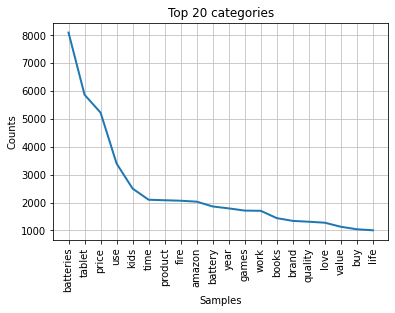

[('batteries', 8090), ('tablet', 5863), ('price', 5221), ('use', 3396), ('kids', 2498), ('time', 2099), ('product', 2081), ('fire', 2064), ('amazon', 2030), ('battery', 1858), ('year', 1789), ('games', 1710), ('work', 1702), ('books', 1440), ('brand', 1341), ('quality', 1311), ('love', 1276), ('value', 1130), ('buy', 1041), ('life', 1004), ('gift', 985), ('size', 976), ('name', 972), ('screen', 956), ('loves', 945), ('kindle', 923), ('device', 915), ('son', 905), ('brands', 877), ('apps', 869), ('deal', 868), ('store', 860), ('daughter', 854), ('purchase', 850), ('case', 817), ('lot', 802), ('works', 789), ('money', 752), ('play', 752), ('christmas', 726), ('tablets', 707), ('everything', 669), ('movies', 632), ('way', 626), ('years', 541), ('things', 536), ('charge', 513), ('get', 505), ('music', 500), ('features', 484)]


In [24]:
fd_cat = analyse(cat, 20, 50, "Top 20 categories")


Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, lemmatizing the word 'Caring' would return 'Care'. Similarly we observed below after lemmatizing the words

In [25]:
#  This function basically takes a list of words and returns lemmatized words
def lemmatize(word_list):
    lem_words = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in all_words:
        lem_words.append( wordnet_lemmatizer.lemmatize(i, pos = 'v'))
    return lem_words

In [26]:
lem_words = lemmatize(all_words)
lem_words[:5]

['order', 'one', 'item', 'bad', 'quality']

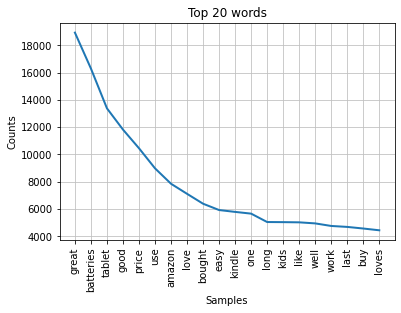

[('great', 18928), ('batteries', 16290), ('tablet', 13370), ('good', 11812), ('price', 10442), ('use', 8968), ('amazon', 7836), ('love', 7098), ('bought', 6372), ('easy', 5908), ('kindle', 5772), ('one', 5644), ('long', 5028), ('kids', 5020), ('like', 5006), ('well', 4928), ('work', 4740), ('last', 4670), ('buy', 4552), ('loves', 4422), ('fire', 4416), ('old', 4272), ('battery', 4264), ('time', 4198), ('would', 4176), ('product', 4162), ('get', 3660), ('year', 3578), ('apps', 3578), ('games', 3420), ('much', 3270), ('screen', 3090), ('works', 3034), ('better', 2884), ('books', 2880), ('really', 2838), ('quality', 2768), ('best', 2766), ('purchased', 2722), ('brand', 2682), ('also', 2578), ('got', 2534), ('far', 2496), ('nice', 2426), ('name', 2376), ('play', 2346), ('reading', 2346), ('read', 2344), ('used', 2306), ('perfect', 2266)]


In [27]:
fd_all = analyse(all_words, 20, 50, "Top 20 words")

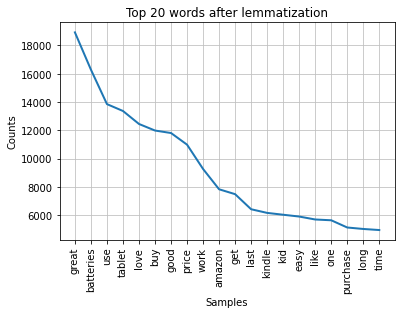

[('great', 18928), ('batteries', 16290), ('use', 13856), ('tablet', 13370), ('love', 12452), ('buy', 11988), ('good', 11812), ('price', 10990), ('work', 9270), ('amazon', 7836), ('get', 7490), ('last', 6424), ('kindle', 6166), ('kid', 6036), ('easy', 5908), ('like', 5700), ('one', 5644), ('purchase', 5134), ('long', 5030), ('time', 4954), ('well', 4928), ('read', 4824), ('brand', 4614), ('fire', 4482), ('old', 4272), ('battery', 4264), ('would', 4176), ('product', 4162), ('game', 4058), ('need', 3700), ('book', 3584), ('year', 3578), ('apps', 3578), ('play', 3504), ('go', 3432), ('much', 3270), ('screen', 3166), ('better', 2886), ('seem', 2882), ('really', 2838), ('quality', 2768), ('best', 2766), ('make', 2644), ('lot', 2628), ('also', 2578), ('name', 2532), ('want', 2528), ('recommend', 2524), ('far', 2496), ('nice', 2426)]


In [28]:
fd_lem = analyse(lem_words, 20, 50, "Top 20 words after lemmatization")

In [29]:
df_temp = pd.DataFrame()
def sent_sentiment(sentence_list):
    for sentence in sentence_list[:5]:
        print(sentence)
        ss = sid.polarity_scores(sentence)
#         print(ss)
#         print(df_dic tionary)
        for k in ss:
            print(str(k) + ": " + str(ss[k]))
            print()
        # df_temp = pd.concat([df_temp, df_dictionary], ignore_index=True)
    print(df_temp)

In [30]:
def create_wordcloud(x):
    wordcloud = WordCloud(max_font_size = 50, max_words = 30, background_color = "white").generate(str(x))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


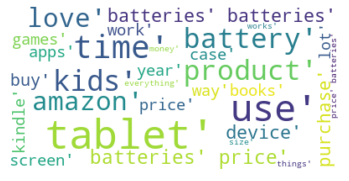

In [31]:
create_wordcloud(cat)

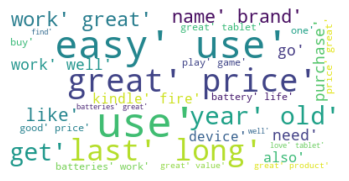

In [32]:
create_wordcloud(lem_words)

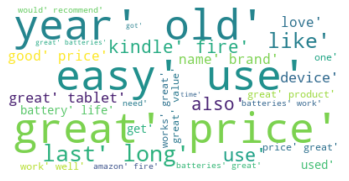

In [33]:
create_wordcloud(all_words)

In [34]:
def get_bigrams(sentence_list):
    bigrams = []
    for sentence in sentence_list:
        tokens = nltk.word_tokenize(str(sentence))
        esBigrams = ngrams(tokens, 2)
        bigrams.append(esBigrams)
    return bigrams

In [35]:
all_bigrams = get_bigrams(all_sentences)

We're now generating sentiments for the sentences. where we're taking adjectives. here we use these tags:  
JJ adjective – ‘big’  
JJR adjective, comparative – ‘bigger’  
JJS adjective, superlative – ‘biggest’  

In [36]:
def gen_sent(x):
    cat_sent = {}
    for w in x:
        for s in all_sentences: 
            if contains_word(s, w):
                tokens = nltk.word_tokenize(str(s))
                tagged = nltk.pos_tag(tokens)
                for tags in tagged:
                    if(tags[1] == 'JJ' or tags[1] == 'JJR' or tags[1] == 'JJS'):
                        if(w in cat_sent):
                            cat_sent[w] +=  sid.polarity_scores(tags[0])['compound']
                        else:
                            cat_sent[w] = sid.polarity_scores(tags[0])['compound']
    for k, v in cat_sent.items():
        cat_sent[k] = v / ((v**2) + 100)**(1/2.0)
    return cat_sent

In [37]:
top20 = []
for w in fd_cat.most_common(50):
    top20.append(w[0])
top20[:5]

['batteries', 'tablet', 'price', 'use', 'kids']

In [38]:
cat_sent = gen_sent(top20)
cat_sent

{'batteries': 0.9999921877377511,
 'tablet': 0.9999967124663414,
 'price': 0.9999969256453513,
 'use': 0.9999946600898666,
 'kids': 0.9999785118372913,
 'time': 0.9999682352638304,
 'product': 0.9999796821137064,
 'fire': 0.9999759728679866,
 'amazon': 0.999992603143039,
 'battery': 0.9999731128713211,
 'year': 0.9999561725947043,
 'games': 0.9999561113688007,
 'work': 0.999964279473795,
 'books': 0.9999516588074197,
 'brand': 0.9998692280222287,
 'quality': 0.9999561992367352,
 'love': 0.9999837388784562,
 'value': 0.9999366231072733,
 'buy': 0.9999810744623402,
 'life': 0.9999197752002247,
 'gift': 0.999843791125466,
 'size': 0.9999287833018518,
 'name': 0.9998551022326243,
 'screen': 0.9999711246580335,
 'loves': 0.9999393703770335,
 'kindle': 0.9999810145032569,
 'device': 0.9998993407405129,
 'son': 0.9997871439429239,
 'brands': 0.9997930724277541,
 'apps': 0.9999688707358492,
 'deal': 0.9999127715183527,
 'store': 0.9999059315703389,
 'daughter': 0.9997972118420729,
 'purchase':

In [39]:
def generate_N_grams(all_sentences,ngram=3):
  bigrams =[]
  for text in all_sentences[:20]:
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
    # print("Sentence after removing stopwords:",words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    bigrams.append(ans)
  return bigrams

In [40]:
print(generate_N_grams(all_sentences))

[['order 3 one', '3 one item', 'one item bad', 'item bad quality', 'bad quality missing', 'quality missing backup', 'missing backup spring', 'backup spring put', 'spring put pcs', 'put pcs aluminum', 'pcs aluminum make', 'aluminum make battery', 'make battery work'], ['bulk always less', 'always less expensive', 'less expensive way', 'expensive way go', 'way go products', 'go products like'], ['well duracell price', 'duracell price happy'], ['seem work well', 'work well name', 'well name brand', 'name brand batteries', 'brand batteries much', 'batteries much better', 'much better price'], ['batteries long lasting', 'long lasting price', 'lasting price great'], ['bought lot batteries', 'lot batteries christmas', 'batteries christmas amazonbasics', 'christmas amazonbasics cell', 'amazonbasics cell good', 'cell good noticed', 'good noticed difference', 'noticed difference brand', 'difference brand name', 'brand name batteries', 'name batteries amazon', 'batteries amazon basic', 'amazon ba

In [41]:
# from nltk.collocations import BigramCollocationFinder
# import re
# import codecs
# import numpy as np
# import string
# def get_bigrams2(sentence_list):
#     bigrams = []
#     for sentence in sentence_list:
#         finder = BigramCollocationFinder.from_words(sentence)
#         bigrams.append(finder)
        
#     return bigrams

In [42]:
# all_bigrams2 = get_bigrams2(all_sentences)

In [43]:
# all_bigrams2

In [44]:
# import nltk
# from nltk.collocations import *
# all_bigram_colloc = []
# bigram_measures = nltk.collocations.BigramAssocMeasures()
# for sentence in all_sentences[0:20]:
#     tokens = nltk.wordpunct_tokenize(sentence)
#     finder = BigramCollocationFinder.from_words(tokens)
#     scored = finder.score_ngrams(bigram_measures.raw_freq)
#     #print(sorted(bigram for bigram, score in scored))
#     all_bigram_colloc.append(finder)
# print(all_bigram_colloc)

## PYATE

PyATE stands for PYthon Automated Term Extraction and is a Python implementation of term extraction algorithms such as C-Value, Basic, Combo Basic, Weirdness and Term Extractor using spaCy POS tagging.

In [45]:
# def apply(self, df: pd.DataFrame, target_col: str, id_col: str, processed_table: str, block_size: int = 5000, verbose: bool = False) -> None:
#         """Function to apply term extraction using the modified pyate module. 
#             It processes the data in batches and loads them into the processed table using the load_to_vertica_function.

#         Args:
#             df (pd.DataFrame): Dataframe containing the data for term extraction.
#             target_col (str): Name of column whose terms need to be extracted.
#             id_col (str): Unique ID column. Primary key.
#             processed_table (str): Table name where you want to store the processed data. (In aws 3-node, pps_quality). If it doesn't exist then this module will create it for you.
#             block_size (int, optional): Size of batches. Defaults to 5000.
#             verbose (bool, optional): Print intermediate outputs. Defaults to False.
#         """
#         for i in range(1, 21):
#             df[f'term_{i}'] = np.nan
#             df[f'term_{i}'] = df[f'term_{i}'].astype(str)
#             df[f'score_{i}'] = np.nan
#             df[f'count_{i}'] = np.nan

#         num_blocks = int(len(df) / block_size) + 1

#         start = 0
#         end = min(len(df), block_size)

#         print(f'Total blocks: {num_blocks}\n\n')

#         for block in range(num_blocks):
#             print(f'Block: {block+1}')
#             print(f'Range: {start}:{end}')

#             # Using apply method
#             result = df[start:end].progress_apply(
#                 lambda row: self.get_terms_using_pyate_on_df(row, target_col, id_col, verbose), axis=1)

#             if verbose:
#                 display(result)

#             start = end
#             end = min(len(df), start+block_size)
#             return result

In [46]:
def restructure(df: pd.DataFrame, id_col: str, target_col: str,
                    cols_to_retain: List[str], top_n_terms: int = 1) -> pd.DataFrame:
        """Restructures the processed table to combine term_1 through term_{top_n_terms} and score_1 through score_{top_n_terms} into a single term and score column.
            Please use this for restructuring the processed_table of the apply function.

        Args:
            df (pd.DataFrame): Dataframe containing rows from the processed_table of the apply function.
            id_col (str): ID column
            target_col (str): Text column from which the terms were extracted.
            cols_to_retain (list[str]): Additional columns you would like to retain into your restructured table like ['business', 'ip2']
            top_n_terms (int, optional): Choose number of terms to keep (max:20). Defaults to 20.

        Returns:
            pd.DataFrame: Restructured dataframe with single term and score columns. Plus word_length column to signify it's n-gram length.
        """

        term_cols = []
        score_cols = []

        for i in range(1, top_n_terms + 1):
            term_cols += [f'term_{i}']
            score_cols += [f'score_{i}']
            # count_cols += [f'count_{i}']

        dfs = []

        if len(cols_to_retain) == 0:
            cols_to_retain = [id_col, target_col]

        for term_col, score_col in zip(term_cols, score_cols):
            reshaped_df = df.loc[:, cols_to_retain +
                                 [term_col, score_col]].copy()
            reshaped_df.columns = cols_to_retain + ['term', 'score']

            dfs.append(reshaped_df)

        reshaped = pd.concat(dfs, ignore_index=True, sort=False)
        # reshaped.dropna(subset=['term', 'score'], inplace=True)
        reshaped['word_length'] = reshaped['term'].str.strip().str.count(' ') + 1

        return reshaped

In [47]:
# this function is just to remove patterns and any list with some other redundant words
def remove_equals(s):

        if len(additional_lst) != 0:
            res_dct = {additional_lst[i]: '' for i in range(0, len(additional_lst))}
            remove_patterns.update(res_dct)
    
        if(isinstance(s, str)):
            s = s.lower()
            for pattern, sub_with in remove_patterns.items():
                s = re.sub(pattern, sub_with, s)
        return s

# This function is to clean the title column
def clean_subject(s):
      if s.split('/') is not None and len(s.split('/')) > 2:
          s = ' '.join(s.split('/')[-2:])
      s = remove_equals(s)
      s = remove_equals(s)
      s = remove_equals(s)
      return s

# this function we've created to remove the terms which are getting repeated 
# and taking the terms which have a greater score 
def remover(terms, scores):
      dict_scores  = dict(zip(terms, scores))
      terms.sort(key=lambda x: x.count(' '), reverse=True)

      new_trm =[]
      for i in terms:
        subset_flag=False
        if len(new_trm)>0:
            for j in new_trm:
              if i in j:
                  matched_str=j
                  subset_flag=True
                  break
              if subset_flag:
                  if dict_scores[i]>dict_scores[matched_str]:
                      dict_scores[matched_str]=dict_scores[i]
          
              else:
                  new_trm.append(i)
        else:
            new_trm.append(i)

        return new_trm, [dict_scores[i] for i in new_trm]

In [48]:
df = file
# df.rename(columns = {'reviews.text':'text','reviews.title': 'title'}, inplace = True)
df.columns

Index(['Case Code', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'keys', 'manufacturer',
       'manufacturerNumber', 'date', 'dateSeen', 'didPurchase', 'rating',
       'sourceURLs', 'text', 'title', 'reviews.username', 'cleaned_text'],
      dtype='object')

In [49]:
target_col = 'cleaned_text'
id_col = 'id'
text_col = 'cleaned_text'

In [50]:
# df_temp = df[['id','brand','primaryCategories','reviews.rating','text','title']]
# df_temp

combo_basic takes in a string or an iterator of strings and outputs a Pandas Series of term-value pairs, where higher values indicate higher chance of being a domain specific term. 

In [51]:
# This function takes a row of a df, text column and id column and gives back a row which has the most important theme
# of the sentence

def get_terms_using_pyate_on_df(row, text_col, id_col, verbose):
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe("combo_basic")
    # print(row)
    if not isinstance(row[text_col], str):
          # print(row[text_col])
          return row
            
    try:
            doc = nlp(row[text_col])

            topn_terms = doc._.combo_basic.sort_values(ascending=False).head(20)

            # topn_terms = P.modified_combo_basic(row[text_col])

            if len(topn_terms) == 0:
                return row

            topn_terms = topn_terms.sort_values(ascending=False).head(20)

            if verbose:
                display(topn_terms)

            topn_terms = topn_terms.reset_index()

            if verbose:
                display(topn_terms)

            terms = topn_terms['index'].to_list()
            scores = topn_terms.loc[:, 0].to_list()
            # counts = topn_terms.loc[:, 'counts'].to_list()
            terms, scores = remover(terms, scores)
            i = 1
            for term, score in zip(terms, scores):
                row[f'term_{i}'] = term
                row[f'score_{i}'] = score
                # row[f'count_{i}'] = count
                i += 1

            # del nlp
            # del doc

            return row
    except Exception as e:
            print(f'Failed to process due to {e} \ntext: {row[id_col]}')
            return row

In [52]:
df_sliced = df.head(1000)
df_sliced.head(5)

,Case Code,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,date,dateSeen,didPurchase,rating,sourceURLs,text,title,reviews.username,cleaned_text
0,5060785351,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,i order 3 of them and one of the item is bad q...
1,5060786065,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,bulk is always the less expensive way to go fo...
2,5060786263,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,well they are not duracell but for the price a...
3,5060786609,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,seem to work as well as name brand batteries a...
4,5060787011,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,these batteries are very long lasting the pric...


In [53]:
import spacy
import pyate

dfs = []
block_size = 500
num_blocks = int(len(df_sliced) / block_size) + 1

start = 0
end = min(len(df_sliced), block_size)

print(f'Total blocks: {num_blocks}\n\n')

for block in range(num_blocks):
    print(f'Block: {block+1}')
    print(f'Range: {start}:{end}')

    # Using apply method
    result = df_sliced[start:end].progress_apply(lambda row: get_terms_using_pyate_on_df(row, target_col, id_col, verbose = False), axis=1)
    dfs.append(result)
    del result
    start = end
    end = min(len(df_sliced), start+block_size)
final_result = pd.concat(dfs,ignore_index = True, sort = False)
# display(final_result)
final_result.head(5)

Total blocks: 3


Block: 1
Range: 0:500


100%|██████████| 500/500 [05:45<00:00,  1.45it/s]


Block: 2
Range: 500:1000


100%|██████████| 500/500 [05:43<00:00,  1.45it/s]


Block: 3
Range: 1000:1000


1it [00:00,  1.48it/s]


,Case Code,asins,brand,categories,cleaned_text,date,dateAdded,dateSeen,dateUpdated,didPurchase,...,manufacturerNumber,name,primaryCategories,rating,reviews.username,score_1,sourceURLs,term_1,text,title
0,5060785351,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",i order 3 of them and one of the item is bad q...,2017-03-02T00:00:00.000Z,2015-10-30T08:59:32Z,2017-08-28T00:00:00Z,2019-04-25T09:08:16Z,NaN,...,HL-002619,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,3,Byger yang,0.761500,https://www.amazon.com/product-reviews/B00QWO9...,pcs of aluminum,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,5060786065,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",bulk is always the less expensive way to go fo...,2016-08-31T00:00:00.000Z,2015-10-30T08:59:32Z,2017-08-28T00:00:00Z,2019-04-25T09:08:16Z,NaN,...,HL-002619,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,4,ByMG,0.480453,https://www.amazon.com/product-reviews/B00QWO9...,expensive way,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,5060786263,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",well they are not duracell but for the price a...,2016-12-06T00:00:00.000Z,2015-10-30T08:59:32Z,2017-08-28T00:00:00Z,2019-04-25T09:08:16Z,NaN,...,HL-002619,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,5,BySharon Lambert,NaN,https://www.amazon.com/product-reviews/B00QWO9...,NaN,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,5060786609,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",seem to work as well as name brand batteries a...,2016-03-28T00:00:00.000Z,2015-10-30T08:59:32Z,2017-08-28T00:00:00Z,2019-04-25T09:08:16Z,NaN,...,HL-002619,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,5,Bymark sexson,0.961500,https://www.amazon.com/product-reviews/B00QWO9...,name brand batteries,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,5060787011,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",these batteries are very long lasting the pric...,2017-04-22T00:00:00.000Z,2015-10-30T08:59:32Z,2017-08-28T00:00:00Z,2019-04-25T09:08:16Z,NaN,...,HL-002619,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,5,Bylinda,NaN,https://www.amazon.com/product-reviews/B00QWO9...,NaN,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [54]:
result = restructure(
                            final_result, 'Case Code', 'cleaned_text', 
                           ['Case Code', 'cleaned_text','brand', 'primaryCategories', 'rating', 'text','title'])
result.head(5)

,Case Code,cleaned_text,brand,primaryCategories,rating,text,title,term,score,word_length
0,5060785351,i order 3 of them and one of the item is bad q...,Amazonbasics,Health & Beauty,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,pcs of aluminum,0.761500,3.0
1,5060786065,bulk is always the less expensive way to go fo...,Amazonbasics,Health & Beauty,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,expensive way,0.480453,2.0
2,5060786263,well they are not duracell but for the price a...,Amazonbasics,Health & Beauty,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,NaN,NaN,NaN
3,5060786609,seem to work as well as name brand batteries a...,Amazonbasics,Health & Beauty,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,name brand batteries,0.961500,3.0
4,5060787011,these batteries are very long lasting the pric...,Amazonbasics,Health & Beauty,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,NaN,NaN,NaN


In [55]:
count_df = result['term'].value_counts(ascending  = False).reset_index().rename(columns = {'index':'term','term':'count'})
count_df

,term,count
0,great price,19
1,good price,8
2,great value,7
3,good value,6
4,other batteries,6
...,...,...
731,production of the wizard of oz,1
732,dead low expectations for the remainder,1
733,run of the mill batteries,1
734,need of battery,1


In [56]:
merged = pd.merge(result,count_df, how = 'left', on = 'term')
merged['count'] = merged['count'].fillna(1)
merged

,Case Code,cleaned_text,brand,primaryCategories,rating,text,title,term,score,word_length,count
0,5060785351,i order 3 of them and one of the item is bad q...,Amazonbasics,Health & Beauty,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,pcs of aluminum,0.761500,3.0,1.0
1,5060786065,bulk is always the less expensive way to go fo...,Amazonbasics,Health & Beauty,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,expensive way,0.480453,2.0,1.0
2,5060786263,well they are not duracell but for the price a...,Amazonbasics,Health & Beauty,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,NaN,NaN,NaN,1.0
3,5060786609,seem to work as well as name brand batteries a...,Amazonbasics,Health & Beauty,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,name brand batteries,0.961500,3.0,5.0
4,5060787011,these batteries are very long lasting the pric...,Amazonbasics,Health & Beauty,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,5060953890,don hold charge as long as other comparable ba...,Amazonbasics,Health & Beauty,3,Don't hold a charge as long as other comparabl...,Don't hold a charge as long as other comparable,other comparable batteries,0.961500,3.0,1.0
996,5060953921,i purchased them thinking they would be great ...,Amazonbasics,Health & Beauty,1,I purchased them thinking they would be a grea...,Don't hold their charge,year in the keypad these batteries,0.200000,6.0,1.0
997,5060953944,don know why waited so long to finally invest ...,Amazonbasics,Health & Beauty,5,Don't know why I waited so long to finally inv...,Don't know why I waited so long to finally inv...,rechargeable batteries,0.480453,2.0,2.0
998,5060954227,good price but batteries just don last as long...,Amazonbasics,Health & Beauty,2,Good price but batteries just don't last as lo...,Don't last,few bucks many of these batteries,0.500000,6.0,1.0


In [57]:
merged['term'] = merged['term'].str.lower()

The RIDF method aims to adjust the IDF method by utilizing the Poisson probability distribution method. The rate of occurrence of non-content terms is independent and random, and therefore, their distribution would follow Poisson with the assumption of the same variance as the mean.

RIDF is basically the difference between the logarithms of the observed IDF and the value predicted under a Poisson model.
Documentation can be found here : [link](https://www.sciencedirect.com/science/article/pii/S0306457318300207)

In [58]:
def get_ridf(df, term_col='term', id_col='Case Code', verbose=False):
  
    
    terms = df[term_col].unique()
    case_ids = df[id_col].unique()
    total_cases = len(case_ids)
    
    term_group = df[[id_col, term_col, 'rating','count']].groupby(term_col).agg({id_col: pd.Series.nunique, 'count': np.sum,'rating':np.average})
    term_group = term_group[term_group[id_col] >= 2]
    
    term_group['df'] = term_group[id_col] / total_cases
    term_group['idf'] = np.log(1 / term_group['df'])
    
    term_group['expected_idf'] = -np.log(1 - np.exp(-term_group['count'] / total_cases))
    term_group['ridf'] = term_group['idf'] - term_group['expected_idf']
    
    term_group.reset_index(inplace=True)
    term_group.sort_values(by=['ridf'], ascending=False, inplace=True, ignore_index=True)
    term_group = term_group.head(500)
    
    return term_group

In [59]:
ridf_df = get_ridf(merged)
# ridf_df['term'] = ridf_df['term'].str.lower()
ridf_df

,term,Case Code,count,rating,df,idf,expected_idf,ridf
0,great price,19,361.0,4.631579,0.019,3.963316,1.193953,2.769363
1,good price,8,64.0,4.875000,0.008,4.828314,2.780702,2.047612
2,great value,7,49.0,5.000000,0.007,4.961845,3.040335,1.921510
3,other batteries,6,36.0,4.000000,0.006,5.115996,3.342182,1.773813
4,good value,6,36.0,4.666667,0.006,5.115996,3.342182,1.773813
5,name brand batteries,5,25.0,5.000000,0.005,5.298317,3.701353,1.596964
6,great batteries,5,25.0,5.000000,0.005,5.298317,3.701353,1.596964
7,name brand,4,16.0,5.000000,0.004,5.521461,4.143156,1.378305
8,great deal,4,16.0,5.000000,0.004,5.521461,4.143156,1.378305
9,good batteries,3,9.0,4.333333,0.003,5.809143,4.715027,1.094116


## Clustering

In [60]:
 import matplotlib.pyplot as plt
 from sklearn.datasets import make_blobs
 from sklearn.cluster import KMeans
 from sklearn.metrics import silhouette_score
 from sklearn.preprocessing import StandardScaler

In [61]:
ridf_df.columns

Index(['term', 'Case Code', 'count', 'rating', 'df', 'idf', 'expected_idf',
       'ridf'],
      dtype='object')

In [62]:
# getting sentiments for the terms
sid = SentimentIntensityAnalyzer()
df_1 = pd.DataFrame()
df_1['term']=['']
df_1['sentiment_type']=''
df_1['sentiment_score']=0
t_df = df_1
for index, row in ridf_df.iterrows():
    # print(row['term'])
    scores = sid.polarity_scores(row['term'])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        # print(row[0])
        df_1['term']=row[0]
        df_1['sentiment_type']=key
        df_1['sentiment_score']=value
        t_df=t_df.append(df_1)
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
sent_df = t_df.pivot_table('sentiment_score', ['term'], 'sentiment_type').reset_index()
sent_df.head(5)

sentiment_type,term,compound,neg,neu,pos
0,aaa batteries,0.0000,0.0,1.000,0.000
1,amazon basic batteries,0.1779,0.0,0.541,0.459
2,amazon basics,0.1779,0.0,0.370,0.630
3,amazon basics batteries,0.1779,0.0,0.541,0.459
4,amazon batteries,0.1779,0.0,0.370,0.630


In [63]:
merged_ridf = pd.merge(merged,ridf_df,how = 'left',on = 'term')
merged_ridf.head(5)

,Case Code_x,cleaned_text,brand,primaryCategories,rating_x,text,title,term,score,word_length,count_x,Case Code_y,count_y,rating_y,df,idf,expected_idf,ridf
0,5060785351,i order 3 of them and one of the item is bad q...,Amazonbasics,Health & Beauty,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,pcs of aluminum,0.761500,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5060786065,bulk is always the less expensive way to go fo...,Amazonbasics,Health & Beauty,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,expensive way,0.480453,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5060786263,well they are not duracell but for the price a...,Amazonbasics,Health & Beauty,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5060786609,seem to work as well as name brand batteries a...,Amazonbasics,Health & Beauty,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,name brand batteries,0.961500,3.0,5.0,5.0,25.0,5.0,0.005,5.298317,3.701353,1.596964
4,5060787011,these batteries are very long lasting the pric...,Amazonbasics,Health & Beauty,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TfidfVectorizer performs both term frequency and inverse document frequency for you, 

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [65]:
features = tfidf.fit_transform(merged.text).toarray()
labels = merged.rating
features.shape
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
!pip install sklearn
# !pip install lda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Latent Dirichlet Allocation (LDA) is a popular topic modeling technique to extract topics from a given corpus. The term latent conveys something that exists but is not yet developed. In other words, latent means hidden or concealed. Now, the topics that we want to extract from the data are also “hidden topics”.

In [67]:
import gensim
from gensim import corpora
Lda = gensim.models.ldamodel.LdaModel
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components = 6, max_iter =20, random_state = 20)
x_topics = lda_model.fit_transform(features)
topic_words = lda_model.components_
topic_words

array([[2.60925075, 1.95242345, 1.59969126, ..., 1.15195862, 3.93908219,
        0.69011481],
       [0.16667823, 0.1666754 , 0.16668206, ..., 0.16668094, 0.16668804,
        0.16667904],
       [0.16683846, 0.16702404, 0.16695653, ..., 0.16824449, 0.16716391,
        0.16670049],
       [0.1669398 , 0.16682026, 0.16667108, ..., 0.16701879, 1.44878314,
        1.48883111],
       [0.16667323, 0.16667684, 0.16667785, ..., 0.16668305, 0.16731949,
        0.16696861],
       [0.16699024, 0.16756763, 0.17220089, ..., 0.55237945, 0.50194754,
        0.16836195]])

In [68]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
     
# spacy for lemmatization
import spacy

In [69]:
bigram = gensim.models.Phrases(all_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [70]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
words_nostops = remove_stopwords(all_words)

In [71]:
words_bigrams = make_bigrams(words_nostops)
len(words_bigrams)

729872

In [72]:
import spacy

nlp = spacy.load("en_core_web_sm")
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [73]:
lemmatized = lemmatization(words_bigrams[:10000])
lemmatized[:5]

[['order'], [], ['item'], ['bad'], ['quality']]

In [74]:
# Create Dictionary
id2word = corpora.Dictionary(lemmatized)

# Create Corpus
texts = lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:10])


[[(0, 1)], [], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)]]


In [75]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

[[('order', 1)],
 [],
 [('item', 1)],
 [('bad', 1)],
 [('quality', 1)],
 [('miss', 1)],
 [('backup', 1)],
 [('spring', 1)],
 [('put', 1)],
 [('pc', 1)]]

we’ll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 20 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [76]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [77]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.392*"long" + 0.188*"work" + 0.097*"quality" + 0.087*"come" + '
  '0.058*"packaging" + 0.023*"plastic" + 0.022*"sit" + 0.016*"case" + '
  '0.001*"cardboard" + 0.000*"premium"'),
 (1,
  '0.307*"well" + 0.273*"buy" + 0.138*"purchase" + 0.029*"batch" + '
  '0.025*"notice" + 0.017*"plug" + 0.017*"simply" + 0.015*"handheld" + '
  '0.014*"voltage" + 0.014*"mouse"'),
 (2,
  '0.131*"try" + 0.081*"beat" + 0.075*"always" + 0.072*"expensive" + '
  '0.063*"also" + 0.062*"never" + 0.053*"around" + 0.052*"run" + '
  '0.031*"flashlight" + 0.028*"pay"'),
 (3,
  '0.352*"use" + 0.084*"need" + 0.084*"love" + 0.047*"thing" + 0.045*"really" '
  '+ 0.039*"many" + 0.038*"even" + 0.031*"first" + 0.030*"day" + 0.022*"job"'),
 (4,
  '0.170*"go" + 0.113*"much" + 0.082*"recommend" + 0.053*"expect" + '
  '0.050*"super" + 0.042*"low" + 0.042*"hold" + 0.036*"happy" + '
  '0.033*"problem" + 0.031*"give"'),
 (5,
  '0.114*"remote" + 0.104*"month" + 0.094*"toy" + 0.073*"size" + '
  '0.059*"rayovac" + 0.042*"eas

In [78]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.522151346742279

Coherence Score:  0.7937096004083866


In [ ]:
!pip install future
!pip install pyLDAvis

exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

If you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

In [80]:
import pyLDAvis
# import pyLDAvis.gensim 
import pyLDAvis.gensim_models # don't skip this

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.019573  0.415286       1        1  18.335503
3      0.058388 -0.040084       2        1   5.839674
0      0.066106  0.045539       3        1   5.612494
1      0.403486 -0.051190       4        1   4.806547
6     -0.028116 -0.024909       5        1   4.778517
11    -0.041898 -0.008265       6        1   4.612186
5     -0.036003 -0.039719       7        1   4.570190
14    -0.004591 -0.053558       8        1   4.374803
2     -0.032413 -0.033309       9        1   4.310903
17    -0.022473 -0.012338      10        1   4.272104
4     -0.038695 -0.021928      11        1   4.208101
18    -0.043796  0.002063      12        1   4.127541
10    -0.041360 -0.026821      13        1   4.023905
7     -0.005234 -0.006793      14        1   4.017122
19    -0.034819 -0.029035      15        1   3.868414
9     -0.047550 -0.011597      16        1   3.865107
16    -0.043665 -0.024189      17        1   3.769811
12    -0.030908 -0.031737      18        1   3.712992
15    -0.047443 -0.025786      19        1   3.528870
8     -0.048589 -0.021631      20        1   3.365217, topic_info=         Term        Freq       Total Category  logprob  loglift
11    battery  745.000000  745.000000  Default  30.0000  30.0000
24      brand  183.000000  183.000000  Default  29.0000  29.0000
27       long  198.000000  198.000000  Default  28.0000  28.0000
28       last  177.000000  177.000000  Default  27.0000  27.0000
89        use  185.000000  185.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
424       car    1.751320    2.576003  Topic20  -5.1529   3.0058
427  kirkland    1.723920    2.548603  Topic20  -5.1687   3.0007
696    double    1.428948    2.253631  Topic20  -5.3564   2.9361
945       yay    1.306998    2.131706  Topic20  -5.4456   2.9025
52    perfect    1.227437    2.052120  Topic20  -5.5084   2.8777

[687 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
59       10  0.971501        aa
60       18  0.977367       aaa
296      12  0.512528   acdelco
1103     11  0.882039      acid
648      17  0.960024  actually
...     ...       ...       ...
550       9  0.897564      wrap
602      13  0.851067     wrong
945      20  0.469108       yay
104       8  0.979775      year
154      15  0.839282       yet

[500 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 4, 1, 2, 7, 12, 6, 15, 3, 18, 5, 19, 11, 8, 20, 10, 17, 13, 16, 9])

In [81]:
vocab_tf_idf = tfidf.get_feature_names()
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.392*"long" + 0.188*"work" + 0.097*"quality" + 0.087*"come" + '
  '0.058*"packaging" + 0.023*"plastic" + 0.022*"sit" + 0.016*"case" + '
  '0.001*"cardboard" + 0.000*"premium"'),
 (1,
  '0.307*"well" + 0.273*"buy" + 0.138*"purchase" + 0.029*"batch" + '
  '0.025*"notice" + 0.017*"plug" + 0.017*"simply" + 0.015*"handheld" + '
  '0.014*"voltage" + 0.014*"mouse"'),
 (2,
  '0.131*"try" + 0.081*"beat" + 0.075*"always" + 0.072*"expensive" + '
  '0.063*"also" + 0.062*"never" + 0.053*"around" + 0.052*"run" + '
  '0.031*"flashlight" + 0.028*"pay"'),
 (3,
  '0.352*"use" + 0.084*"need" + 0.084*"love" + 0.047*"thing" + 0.045*"really" '
  '+ 0.039*"many" + 0.038*"even" + 0.031*"first" + 0.030*"day" + 0.022*"job"'),
 (4,
  '0.170*"go" + 0.113*"much" + 0.082*"recommend" + 0.053*"expect" + '
  '0.050*"super" + 0.042*"low" + 0.042*"hold" + 0.036*"happy" + '
  '0.033*"problem" + 0.031*"give"'),
 (5,
  '0.114*"remote" + 0.104*"month" + 0.094*"toy" + 0.073*"size" + '
  '0.059*"rayovac" + 0.042*"eas

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
#  Define the number of Words that we want to print in every topic : n_top_words
n_top_words = 5

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words2 = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words_temp = topic_words2[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words_temp)

Topic 1 ['the' 'batteries' 'of' 'and']
Topic 2 ['great' 'great price' 'price' 'product']
Topic 3 ['beat' 'expected' 'can beat' 'quality']
Topic 4 ['value' 'good' 'as' 'batteries']
Topic 5 ['described' 'as described' 'always' 'buy']
Topic 6 ['as' 'good' 'they' 'long']


Computational Model

In [83]:
ridf_merged_sent = pd.merge(ridf_df,sent_df, how = 'left', on = 'term')
ridf_merged_sent.head(5)

,term,Case Code,count,rating,df,idf,expected_idf,ridf,compound,neg,neu,pos
0,great price,19,361.0,4.631579,0.019,3.963316,1.193953,2.769363,0.6249,0.0,0.196,0.804
1,good price,8,64.0,4.875000,0.008,4.828314,2.780702,2.047612,0.4404,0.0,0.256,0.744
2,great value,7,49.0,5.000000,0.007,4.961845,3.040335,1.921510,0.7579,0.0,0.000,1.000
3,other batteries,6,36.0,4.000000,0.006,5.115996,3.342182,1.773813,0.0000,0.0,1.000,0.000
4,good value,6,36.0,4.666667,0.006,5.115996,3.342182,1.773813,0.6486,0.0,0.000,1.000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


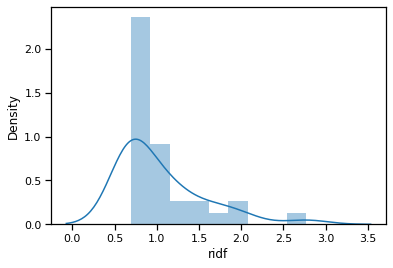

In [84]:
import seaborn as sns
sns.set_context('notebook')

hennepin_radon = ridf_merged_sent.query('rating >4').ridf
sns.distplot(hennepin_radon)

In [85]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 25.1 MB/s 
     |████████████████████████████████| 1.8 MB 63.0 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=3f4b8da0172eff1ca85821b188fee82ee654578df0fc070ab2cdcce8f84ba3f0
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [86]:
from pymc3 import Model, Normal, Uniform

with Model() as radon_model:
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

In [87]:
with radon_model:    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)

In [88]:
from pymc3 import fit

with radon_model:

    samples = fit().sample(1000)

/usr/local/lib/python3.8/dist-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/usr/local/lib/python3.8/dist-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scal

In [89]:
ridf_merged_sent.head()

,term,Case Code,count,rating,df,idf,expected_idf,ridf,compound,neg,neu,pos
0,great price,19,361.0,4.631579,0.019,3.963316,1.193953,2.769363,0.6249,0.0,0.196,0.804
1,good price,8,64.0,4.875000,0.008,4.828314,2.780702,2.047612,0.4404,0.0,0.256,0.744
2,great value,7,49.0,5.000000,0.007,4.961845,3.040335,1.921510,0.7579,0.0,0.000,1.000
3,other batteries,6,36.0,4.000000,0.006,5.115996,3.342182,1.773813,0.0000,0.0,1.000,0.000
4,good value,6,36.0,4.666667,0.006,5.115996,3.342182,1.773813,0.6486,0.0,0.000,1.000


In [90]:
# ridf_merged_sent['sentiment'] = np.where(ridf_merged_sent['pos']>0.5, 'Positive','Negative')

# ridf_merged_sent['sentiment'] = np.where(ridf_merged_sent['neu']==1,'Neutral','')
# for i, row in ridf_merged_sent.iterrows():
#   if row['neu'] == 1:
#     # print(row['sentiment'])
#     ridf_merged_sent['sentiment'][i] = 'Neutral'

# ridf_merged_sent.head(10)

In [91]:
ridf_merged_sent['Positive'] = np.where(ridf_merged_sent['pos']>0.5, True, False)
ridf_merged_sent['Negative'] = np.where(ridf_merged_sent['neg']>0.5, True, False)
ridf_merged_sent['Neutral'] = np.where(ridf_merged_sent['neu']==1, True, False)
ridf_merged_sent.head(5)

,term,Case Code,count,rating,df,idf,expected_idf,ridf,compound,neg,neu,pos,Positive,Negative,Neutral
0,great price,19,361.0,4.631579,0.019,3.963316,1.193953,2.769363,0.6249,0.0,0.196,0.804,True,False,False
1,good price,8,64.0,4.875000,0.008,4.828314,2.780702,2.047612,0.4404,0.0,0.256,0.744,True,False,False
2,great value,7,49.0,5.000000,0.007,4.961845,3.040335,1.921510,0.7579,0.0,0.000,1.000,True,False,False
3,other batteries,6,36.0,4.000000,0.006,5.115996,3.342182,1.773813,0.0000,0.0,1.000,0.000,False,False,True
4,good value,6,36.0,4.666667,0.006,5.115996,3.342182,1.773813,0.6486,0.0,0.000,1.000,True,False,False


In [92]:
ridf_merged_sent.groupby(['Positive','Negative', 'Neutral'])['count'].agg(['mean', 'var'])


mean          var
Positive Negative Neutral                        
False    False    False     4.833333     4.166667
                  True      7.888889    80.104575
         True     False     9.000000          NaN
True     False    False    34.666667  6934.117647

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


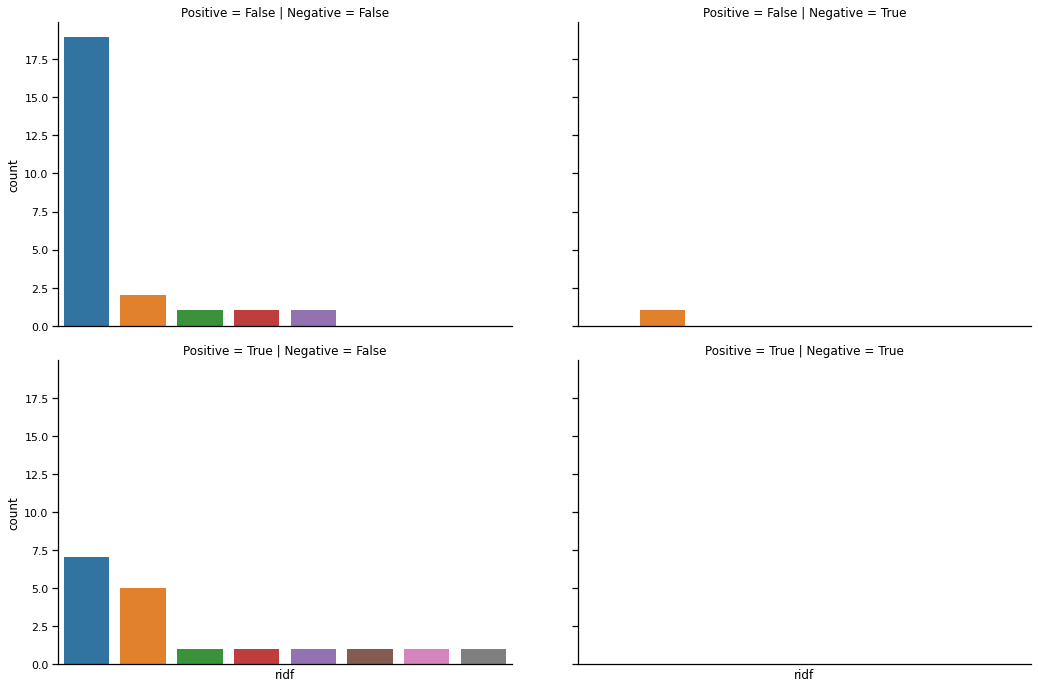

In [93]:
g = sns.factorplot(x='ridf', row='Positive', col='Negative', data=ridf_merged_sent, kind='count', aspect=1.5)

# Make x-axis ticklabels less crowded
ax = g.axes[0, 1]
labels = range(len(ax.get_xticklabels(which='both')))
ax.set_xticks(labels[::5])
ax.set_xticklabels(labels[::5]);

In [ ]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline


fml = 'count ~ Positive + Negative + Negative:Positive'

with pm.Model() as model4:
    pm.glm.GLM.from_formula(formula=fml, data=ridf_merged_sent, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(5000, cores=2)

In [95]:
def plot_traces(trcs, varnames):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, var_names=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,var_names=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, var_names=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [96]:
rvs = [rv.name for rv in strip_derived_rvs(model4.unobserved_RVs)]
rvs

['Intercept',
 'Positive[T.True]',
 'Negative[T.True]',
 'Negative[T.True]:Positive[T.True]',
 'mu',
 'alpha']

All the results are contained in the trace variable. This is a pymc3 results object. It contains some information that we might want to extract at times. Varnames tells us all the variable names setup in our model.

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/usr/local/lib/python3.8/dist-packages/theano/tensor/basi

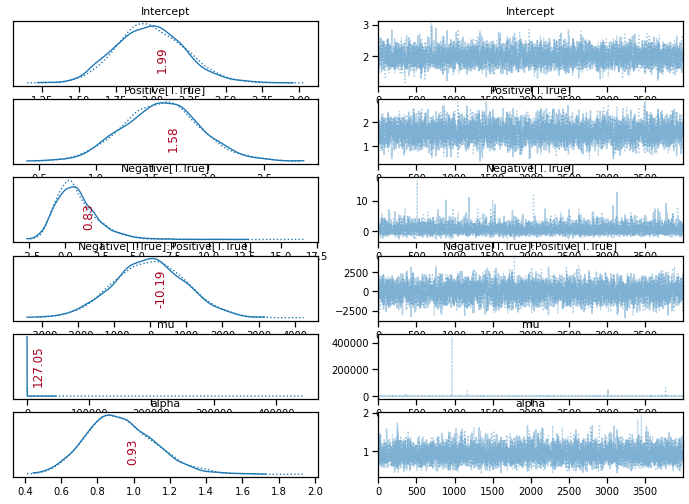

In [97]:
plot_traces(trace[1000:], varnames=rvs);

In [98]:
np.exp(pm.summary(trace[1000:], var_names=rvs))

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/usr/local/lib/python3.8/dist-packages/theano/tensor/basi

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,7.308222e+00,1.261120,4.806648,1.129093e+01,1.003005e+00,1.002002e+00,inf,inf,2.718282
Positive[T.True],4.879291e+00,1.410579,2.549762,9.253483e+00,1.005013e+00,1.003005e+00,inf,inf,2.718282
Negative[T.True],2.291027e+00,4.540331,0.225147,4.226672e+01,1.024290e+00,1.022244e+00,inf,inf,2.718282
Negative[T.True]:Positive[T.True],3.750636e-05,inf,0.000000,inf,5.181396e+05,9.465557e+04,inf,inf,2.718282
mu,1.503536e+55,inf,1.002002,3.452456e+46,5.659710e+25,1.624936e+18,inf,inf,2.718282
alpha,2.534509e+00,1.209250,1.818478,3.672968e+00,1.002002e+00,1.002002e+00,inf,inf,2.718282


In [99]:
np.exp(pm.summary(trace[1000:], var_names=rvs)[['mean','hdi_3%','hdi_97%']])

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/theano/tensor/basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
/usr/local/lib/python3.8/dist-packages/theano/tensor/basi

,mean,hdi_3%,hdi_97%
Intercept,7.308222e+00,4.806648,1.129093e+01
Positive[T.True],4.879291e+00,2.549762,9.253483e+00
Negative[T.True],2.291027e+00,0.225147,4.226672e+01
Negative[T.True]:Positive[T.True],3.750636e-05,0.000000,inf
mu,1.503536e+55,1.002002,3.452456e+46
alpha,2.534509e+00,1.818478,3.672968e+00
